# test_cpm
Testing notebook to ensure graphical output is as expected and that long-run simulations are correct.

In [1]:
from cpm import Cpm, getPCritical, getCDF, sample
from test_utilities import testActivities1_2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from collections import Counter
import pprint
pp = pprint.PrettyPrinter(indent=4)

## Sampling

In [2]:
PCritical, activityIDs = getPCritical(testActivities1_2)
dataset = getCDF(testActivities1_2)

In [3]:
dataset[0:5]

[{'x': 14.322915699377832, 'y': 0.0},
 {'x': 14.75830683613194, 'y': 0.001},
 {'x': 14.952233656550682, 'y': 0.002},
 {'x': 15.03951793360564, 'y': 0.003},
 {'x': 15.065371004292945, 'y': 0.004}]

In [4]:
dataset[-5:]

[{'x': 21.760541194009377, 'y': 0.995},
 {'x': 21.827728246369542, 'y': 0.996},
 {'x': 21.896082785671872, 'y': 0.997},
 {'x': 22.152281586937853, 'y': 0.998},
 {'x': 22.228711400876428, 'y': 0.999}]

In [5]:
arr_durations = np.array([data["x"] for data in dataset])
arr_percentages = np.array([data["y"] for data in dataset])

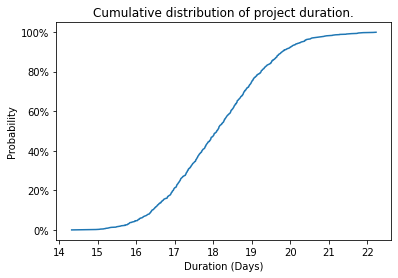

In [6]:
ax = plt.plot(arr_durations, arr_percentages)
plt.title("Cumulative distribution of project duration.")
plt.xlabel("Duration (Days)")
plt.ylabel("Probability")

# set y-axis ticks as percent values, with 1 being 100%
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

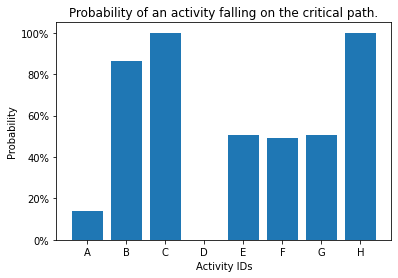

In [7]:
plt.bar(activityIDs, PCritical)
plt.title("Probability of an activity falling on the critical path.")
plt.xlabel("Activity IDs")
plt.ylabel("Probability")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

In [8]:
print(f"5% probability the project is done in {np.percentile(arr_durations, 5)} days.")
print(f"50% probability the project is done in {np.percentile(arr_durations, 50)} days.")
print(f"95% probability the project is done in {np.percentile(arr_durations, 90)} days.")

5% probability the project is done in 16.0431947107175 days.
50% probability the project is done in 18.08946024965836 days.
95% probability the project is done in 19.782741208537587 days.
